# Lab 5.3T Iris Dataset Using tf.estimator API

Here we will do the Iris Dataset using the tf.estimator API

In [2]:
import os
import urllib

import numpy as np
import tensorflow as tf
import pandas as pd
%matplotlib inline

IRIS_TRAINING = "iris_training.csv"
IRIS_TRAINING_URL = "https://s3.amazonaws.com/elephantscale-public/data/iris/tensorflow/iris_training.csv"
IRIS_TEST = "iris_test.csv"
IRIS_TEST_URL = "https://s3.amazonaws.com/elephantscale-public/data/iris/tensorflow/iris_test.csv"

CSV_COLUMN_NAMES = ['SepalLength', 'SepalWidth',
                    'PetalLength', 'PetalWidth', 'Species']

SPECIES = ['Setosa', 'Versicolor', 'Virginica']

BATCH_SIZE=10




## The Iris classification problem

Imagine you are a botanist seeking an automated way to categorize each Iris flower you find. Machine learning provides many algorithms to statistically classify flowers. For instance, a sophisticated machine learning program could classify flowers based on photographs. Our ambitions are more modest—we're going to classify Iris flowers based on the length and width measurements of their [sepals](https://en.wikipedia.org/wiki/Sepal) and [petals](https://en.wikipedia.org/wiki/Petal).

The Iris genus entails about 300 species, but our program will only classify the following three:

* Iris setosa
* Iris virginica
* Iris versicolor

<table>
  <tr><td>
    <img src="https://www.tensorflow.org/images/iris_three_species.jpg"
         alt="Petal geometry compared for three iris species: Iris setosa, Iris virginica, and Iris versicolor">
  </td></tr>
  <tr><td align="center">
    <b>Figure 1.</b> <a href="https://commons.wikimedia.org/w/index.php?curid=170298">Iris setosa</a> (by <a href="https://commons.wikimedia.org/wiki/User:Radomil">Radomil</a>, CC BY-SA 3.0), <a href="https://commons.wikimedia.org/w/index.php?curid=248095">Iris versicolor</a>, (by <a href="https://commons.wikimedia.org/wiki/User:Dlanglois">Dlanglois</a>, CC BY-SA 3.0), and <a href="https://www.flickr.com/photos/33397993@N05/3352169862">Iris virginica</a> (by <a href="https://www.flickr.com/photos/33397993@N05">Frank Mayfield</a>, CC BY-SA 2.0).<br/>&nbsp;
  </td></tr>
</table>

Fortunately, someone has already created a [data set of 120 Iris flowers](https://en.wikipedia.org/wiki/Iris_flower_data_set) with the sepal and petal measurements. This is a classic dataset that is popular for beginner machine learning classification problems.

In [3]:

def load_data(y_name='Species'):
    """Returns the iris dataset as (train_x, train_y), (test_x, test_y)."""
   
    train = pd.read_csv(IRIS_TRAINING_URL, names=CSV_COLUMN_NAMES, header=0)
    train_x, train_y = train, train.pop(y_name)

    test = pd.read_csv(IRIS_TEST_URL, names=CSV_COLUMN_NAMES, header=0)
    test_x, test_y = test, test.pop(y_name)

    return (train_x, train_y, test_x, test_y)

train_x, train_y, test_x, test_y = load_data()


In [4]:
# Let's take a look at the data

pd_df = pd.read_csv(IRIS_TRAINING_URL, names=CSV_COLUMN_NAMES, header=0)



LinAlgError: singular matrix

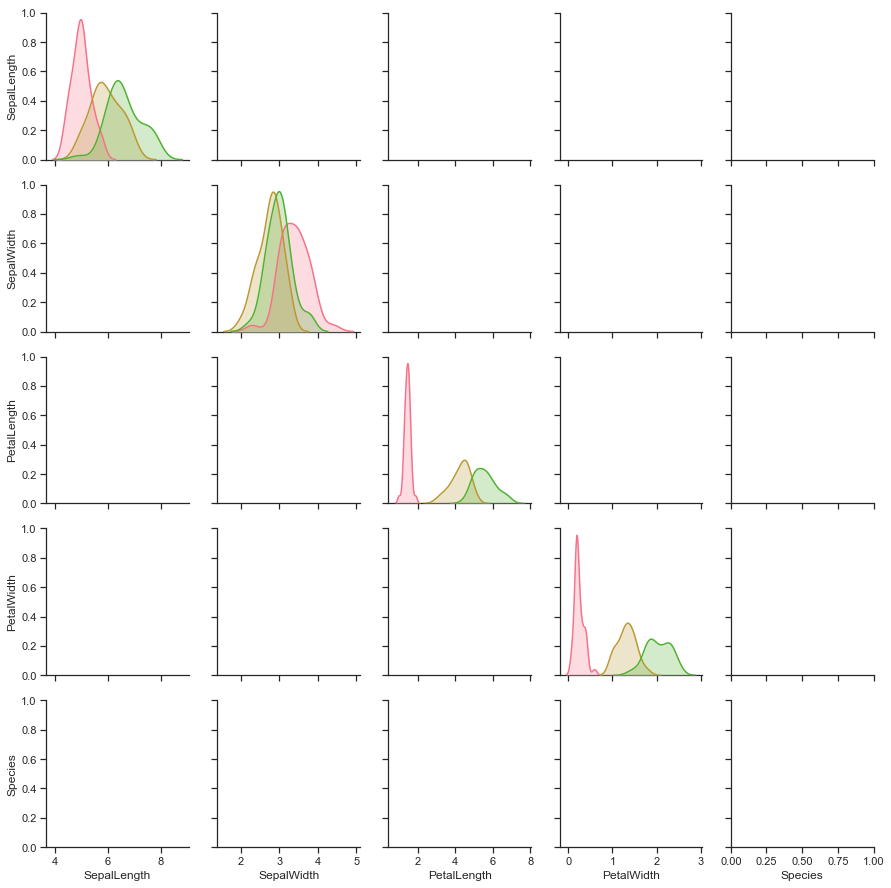

In [4]:
#Plotting the pairwise relationship of different parameters

import seaborn as sns
sns.set(style="ticks")
sns.set_palette("husl")
sns.pairplot(pd_df.iloc[:,0:5],hue="Species")

## Build the Feature Columns

In [5]:
# Specify that all features have real-value data
feature_columns = []
for key in train_x.keys():
    feature_columns.append(tf.feature_column.numeric_column(key=key))

## Build the Neural Network:

**=> TODO: build a 3 layer network with hidden layer as follows **

* First Layer: 10 neurons
* Second Layer: 20 Neurons
* Third Layer: 10 neurons

In [6]:

# Build 3 layer DNN with 10, 20, 10 units respectively.
classifier = tf.estimator.DNNClassifier(feature_columns=feature_columns,
                                            hidden_units=[10, 20, 10],
                                            n_classes=3,
                                            model_dir="/tmp/iris_model")

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/iris_model', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000002794DB7F438>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [7]:
# Define the input function

def train_input_fn(features, labels, batch_size):
    """An input function for training"""
    # Convert the inputs to a Dataset.
    dataset = tf.data.Dataset.from_tensor_slices((dict(features), labels))

    # Shuffle, repeat, and batch the examples.
    dataset = dataset.shuffle(1000).repeat().batch(batch_size)

    # Return the dataset.
    return dataset


**=> TODO: Run for 1000 epochs**

In [11]:

# Fit model.
# Train the Model.
classifier.train(
    input_fn=lambda:train_input_fn(train_x, train_y, BATCH_SIZE), 
    steps=1000)





TypeError: train() got an unexpected keyword argument 'callbacks'

In [10]:

def eval_input_fn(features, labels, batch_size):
    """An input function for evaluation or prediction"""
    
    features=dict(features)
    inputs = features if labels is None else (features, labels)
   
    # Convert the inputs to a Dataset.
    return tf.data.Dataset.from_tensor_slices(inputs).batch(batch_size)


# Evaluate the model.
eval_result = classifier.evaluate(
    input_fn=lambda:eval_input_fn(test_x, test_y, BATCH_SIZE))

print('\nTest set accuracy: {accuracy:0.3f}\n'.format(**eval_result))


INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-05-03T18:21:26Z
INFO:tensorflow:Graph was finalized.
Instructions for updating:
Use standard file APIs to check for files with this prefix.
INFO:tensorflow:Restoring parameters from /tmp/iris_model\model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2019-05-03-18:21:27
INFO:tensorflow:Saving dict for global step 1000: accuracy = 0.96666664, average_loss = 0.063624576, global_step = 1000, loss = 0.6362457
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 1000: /tmp/iris_model\model.ckpt-1000

Test set accuracy: 0.967



In [11]:
# Generate predictions from the model
expected = ['Setosa', 'Versicolor', 'Virginica']
predict_x = {
    'SepalLength': [5.1, 5.9, 6.9],
    'SepalWidth': [3.3, 3.0, 3.1],
    'PetalLength': [1.7, 4.2, 5.4],
    'PetalWidth': [0.5, 1.5, 2.1],
}

predictions = classifier.predict(
    input_fn=lambda:eval_input_fn(predict_x, test_y[:3], batch_size=BATCH_SIZE))

list(predictions)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/iris_model\model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


[{'logits': array([  5.106233,  -2.952523, -11.659103], dtype=float32),
  'probabilities': array([9.9968386e-01, 3.1622010e-04, 5.2332243e-08], dtype=float32),
  'class_ids': array([0], dtype=int64),
  'classes': array([b'0'], dtype=object)},
 {'logits': array([-4.439247 ,  3.6529713, -1.6956248], dtype=float32),
  'probabilities': array([3.0437004e-04, 9.9496484e-01, 4.7308803e-03], dtype=float32),
  'class_ids': array([1], dtype=int64),
  'classes': array([b'1'], dtype=object)},
 {'logits': array([-7.0688987,  2.854452 ,  6.0749903], dtype=float32),
  'probabilities': array([1.8822415e-06, 3.8400032e-02, 9.6159810e-01], dtype=float32),
  'class_ids': array([2], dtype=int64),
  'classes': array([b'2'], dtype=object)}]

## Interpret The results

Look at the probability output above. There were 3 sample shown, with the probabilities. For two of them, our model had a great deal of certainty of its response. For the last, the certainty was still high but somewhat less.

Which model had the greatest deal of uncertainty? (Note that certainty is still quite high).  If not the predicted value, which is the likely alternative we could consider?